<a href="https://colab.research.google.com/github/Nlasry1996/Nautica-Home/blob/main/Labelencoder_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Nlasry1996/Nautica-Home.git # Connect to Github


fatal: destination path 'Nautica-Home' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Nautica-Home/NHDataset - NHDataset.csv')
df

,Order_Date,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name
0,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHD1001-15-2,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,427,499,15,0,0,150/200,2,PAGEANT BLUE
1,4/3/2022,100110,SO22000098,3,Ir ha-Karmel,חיפה,NHD1002-15-2,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,469,549,17,0,0,150/200,2,PAGEANT BLUE
2,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3004-15-16,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,16,Bruschetta
3,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3005-15-26,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,26,Peach Bud
4,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3006-15-23,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,מגבות,מגבות אקווה פיברו,213,249,10,0,0,150/90,23,China Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71002M8,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,7000,Loungewear,102,119,5,0,5,M,8,Lolipop
9157,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L6,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,6,Cartouch
9158,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L8,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,8,Lolipop
9159,4/30/2023,103231,SO23001624,1,Kiryat-Motzkin,חיפה,NHB1006-16-13,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,220B,סאטן 220 בסיק,512,599,28,28,0,160/200,13,L. PINK


In [3]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) # Convert 'Order_Date' to a datetime format.
df['Month'] = df['Order_Date'].dt.month #Extract the month feature.
df=df.drop(['Order_Date'], axis=1)
df

,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name,Month
0,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHD1001-15-2,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,427,499,15,0,0,150/200,2,PAGEANT BLUE,4
1,100110,SO22000098,3,Ir ha-Karmel,חיפה,NHD1002-15-2,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,469,549,17,0,0,150/200,2,PAGEANT BLUE,4
2,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3004-15-16,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,16,Bruschetta,4
3,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3005-15-26,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,26,Peach Bud,4
4,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3006-15-23,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,מגבות,מגבות אקווה פיברו,213,249,10,0,0,150/90,23,China Blue,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,103230,SO23001622,1,Ashdod,דרום,NLW-71002M8,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,7000,Loungewear,102,119,5,0,5,M,8,Lolipop,4
9157,103230,SO23001622,1,Ashdod,דרום,NLW-71003L6,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,6,Cartouch,4
9158,103230,SO23001622,1,Ashdod,דרום,NLW-71003L8,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,8,Lolipop,4
9159,103231,SO23001624,1,Kiryat-Motzkin,חיפה,NHB1006-16-13,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,220B,סאטן 220 בסיק,512,599,28,28,0,160/200,13,L. PINK,4


In [4]:
from sklearn.preprocessing import LabelEncoder # Encode Categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Customer_ID']= label_encoder.fit_transform(df['Customer_ID'])
df['Order_ID'] = label_encoder.fit_transform(df['Order_ID'])
df['Catalog_Number'] = label_encoder.fit_transform(df['Catalog_Number'])
df['City'] = label_encoder.fit_transform(df['City'])
df['District'] = label_encoder.fit_transform(df['District'])
df['Family_Item_ID'] = label_encoder.fit_transform(df['Family_Item_ID'])
df['Family_Item_Name'] = label_encoder.fit_transform(df['Family_Item_Name'])
df['Size'] = label_encoder.fit_transform(df['Size'])
df['Color_ID'] = label_encoder.fit_transform(df['Color_ID'])
df['Color_Name'] = label_encoder.fit_transform(df['Color_Name'])
df


,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name,Month
0,8,0,1,77,2,216,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,16,15,427,499,15,0,0,4,1,24,4
1,8,0,3,77,2,219,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,16,15,469,549,17,0,0,4,1,24,4
2,8,0,1,77,2,428,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,10,4,196,229,10,0,0,21,14,2,4
3,8,0,1,77,2,434,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,10,4,196,229,10,0,0,21,21,28,4
4,8,0,1,77,2,440,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,10,4,213,249,10,0,0,5,18,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,2667,3337,1,11,1,584,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,4,1,102,119,5,0,5,24,7,18,4
9157,2667,3337,1,11,1,598,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,4,1,110,129,5,0,5,23,5,4,4
9158,2667,3337,1,11,1,600,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,4,1,110,129,5,0,5,23,7,18,4
9159,2668,3339,1,111,2,40,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,1,10,512,599,28,28,0,6,12,17,4


In [5]:
# Calculate the count of orders per customer
df_customer_orders = df.groupby('Customer_ID')['Order_ID'].count().reset_index()
df_customer_orders = df_customer_orders.rename(columns={'Order_ID': 'Num_Orders'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_customer_orders, on='Customer_ID', how='left')
df


,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,...,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name,Month,Num_Orders
0,8,0,1,77,2,216,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,16,...,427,499,15,0,0,4,1,24,4,6
1,8,0,3,77,2,219,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,16,...,469,549,17,0,0,4,1,24,4,6
2,8,0,1,77,2,428,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,10,...,196,229,10,0,0,21,14,2,4,6
3,8,0,1,77,2,434,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,10,...,196,229,10,0,0,21,21,28,4,6
4,8,0,1,77,2,440,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,10,...,213,249,10,0,0,5,18,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,2667,3337,1,11,1,584,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,4,...,102,119,5,0,5,24,7,18,4,7
9157,2667,3337,1,11,1,598,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,4,...,110,129,5,0,5,23,5,4,4,7
9158,2667,3337,1,11,1,600,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,4,...,110,129,5,0,5,23,7,18,4,7
9159,2668,3339,1,111,2,40,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,1,...,512,599,28,28,0,6,12,17,4,2


In [6]:
df_catalognumber_orders = df.groupby('Catalog_Number')['Order_ID'].count().reset_index()
df_catalognumber_orders = df_catalognumber_orders.rename(columns={'Order_ID': 'Count_Times_Articles_Appears'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_catalognumber_orders, on='Catalog_Number', how='left')
#Count of how many article were sell in this Item Family
df_family_item_orders = df.groupby('Family_Item_Name')['Order_ID'].count().reset_index()
df_family_item_orders = df_family_item_orders.rename(columns={'Order_ID': 'Number_FI_per_Year'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_family_item_orders, on='Family_Item_Name', how='left')
#How many of these items are sold by month
df['Family_Item_Count_Monthly'] = df.groupby(['Month', 'Family_Item_ID'])['Order_ID'].transform('count')
df

,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,...,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name,Month,Num_Orders,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
0,8,0,1,77,2,216,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,16,...,0,0,4,1,24,4,6,58,371,36
1,8,0,3,77,2,219,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,16,...,0,0,4,1,24,4,6,65,371,36
2,8,0,1,77,2,428,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,10,...,0,0,21,14,2,4,6,29,984,140
3,8,0,1,77,2,434,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,10,...,0,0,21,21,28,4,6,33,984,140
4,8,0,1,77,2,440,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,10,...,0,0,5,18,6,4,6,19,984,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,2667,3337,1,11,1,584,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,4,...,0,5,24,7,18,4,7,13,2786,248
9157,2667,3337,1,11,1,598,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,4,...,0,5,23,5,4,4,7,5,2786,248
9158,2667,3337,1,11,1,600,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,4,...,0,5,23,7,18,4,7,3,2786,248
9159,2668,3339,1,111,2,40,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,1,...,28,0,6,12,17,4,2,10,618,78


In [7]:
df=df.drop(['Added_Date'],axis =1)
df=df.drop(['Hebrew_Description'],axis =1)
df=df.drop(['English_Description'],axis =1)
df

,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,...,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name,Month,Num_Orders,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
0,8,0,1,77,2,216,16,15,427,499,...,0,0,4,1,24,4,6,58,371,36
1,8,0,3,77,2,219,16,15,469,549,...,0,0,4,1,24,4,6,65,371,36
2,8,0,1,77,2,428,10,4,196,229,...,0,0,21,14,2,4,6,29,984,140
3,8,0,1,77,2,434,10,4,196,229,...,0,0,21,21,28,4,6,33,984,140
4,8,0,1,77,2,440,10,4,213,249,...,0,0,5,18,6,4,6,19,984,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,2667,3337,1,11,1,584,4,1,102,119,...,0,5,24,7,18,4,7,13,2786,248
9157,2667,3337,1,11,1,598,4,1,110,129,...,0,5,23,5,4,4,7,5,2786,248
9158,2667,3337,1,11,1,600,4,1,110,129,...,0,5,23,7,18,4,7,3,2786,248
9159,2668,3339,1,111,2,40,1,10,512,599,...,28,0,6,12,17,4,2,10,618,78


In [8]:
df.corr()

,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,...,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name,Month,Num_Orders,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
Customer_ID,1.000000,0.860316,-0.027668,-0.061967,0.049678,0.048226,-0.096048,-0.078293,-0.028667,-0.028666,...,0.040687,0.130036,0.084694,0.009338,-0.034482,-0.376616,-0.289687,-0.102753,0.132247,0.262428
Order_ID,0.860316,1.000000,-0.017800,-0.050639,0.049749,0.073901,-0.093287,-0.115198,-0.064622,-0.064587,...,0.046230,0.156526,0.122300,0.047101,-0.026862,-0.466512,-0.057430,-0.139673,0.183040,0.306257
Quantity,-0.027668,-0.017800,1.000000,-0.015630,0.015778,-0.053672,0.153018,0.083071,-0.071637,-0.071621,...,-0.017794,-0.111876,-0.020157,0.031300,0.110584,0.011745,0.000946,0.037236,-0.177185,-0.126853
City,-0.061967,-0.050639,-0.015630,1.000000,-0.039780,-0.022676,0.055890,0.034990,0.017926,0.017941,...,0.000381,-0.043493,-0.058616,0.009475,0.019892,0.036924,0.048447,0.045059,-0.063756,-0.010960
District,0.049678,0.049749,0.015778,-0.039780,1.000000,-0.015793,0.059242,-0.000790,-0.022093,-0.022118,...,-0.007952,0.009452,0.008367,0.040006,0.024728,0.035780,0.021908,0.002223,-0.036586,-0.042041
Catalog_Number,0.048226,0.073901,-0.053672,-0.022676,-0.015793,1.000000,0.075656,-0.714568,-0.346103,-0.345965,...,-0.310095,-0.107264,0.689424,-0.113452,-0.096734,-0.226173,0.054508,-0.090679,0.724280,0.453630
Family_Item_ID,-0.096048,-0.093287,0.153018,0.055890,0.059242,0.075656,1.000000,0.070211,-0.053098,-0.053172,...,-0.180309,-0.207768,-0.086068,0.164861,0.324067,0.136574,0.011423,0.354685,-0.379171,-0.235095
Family_Item_Name,-0.078293,-0.115198,0.083071,0.034990,-0.000790,-0.714568,0.070211,1.000000,0.368362,0.368357,...,0.153255,-0.164568,-0.676410,-0.072872,0.060523,0.194402,-0.071175,0.125043,-0.731806,-0.472360
Sales_Price_No_VAT,-0.028667,-0.064622,-0.071637,0.017926,-0.022093,-0.346103,-0.053098,0.368362,1.000000,0.999999,...,0.220537,-0.074800,-0.461665,-0.165187,-0.042411,0.075167,-0.104941,0.086180,-0.311624,-0.199782
Sales_Price_With_VAT,-0.028666,-0.064587,-0.071621,0.017941,-0.022118,-0.345965,-0.053172,0.368357,0.999999,1.000000,...,0.220551,-0.074812,-0.461682,-0.165209,-0.042355,0.075072,-0.104880,0.085972,-0.311468,-0.199685


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called 'data'
# Splitting the data into features (X) and target variable (y)
X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the XGBoost regression model
model = xgb.XGBRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)



[ 116.02193   184.0064    171.99316  ... 1121.986     276.00464
   46.992363]


In [10]:
df_pred = pd.DataFrame(y_pred)
df_pred

,0
0,116.032333
1,184.268585
2,171.852036
3,275.816681
4,237.779190
...,...
1828,6.810684
1829,78.307892
1830,1122.032715
1831,276.012482


In [11]:
all_pred=model.predict(X).round()
print(all_pred)
df.insert(loc=21,column='Predictions_FI',value=all_pred)
df

[ 36.  36. 140. ... 248.  77.  78.]


,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,...,Cost_Production_USD,Size,Color_ID,Color_Name,Month,Num_Orders,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Predictions_FI
0,8,0,1,77,2,216,16,15,427,499,...,0,4,1,24,4,6,58,371,36,36.0
1,8,0,3,77,2,219,16,15,469,549,...,0,4,1,24,4,6,65,371,36,36.0
2,8,0,1,77,2,428,10,4,196,229,...,0,21,14,2,4,6,29,984,140,140.0
3,8,0,1,77,2,434,10,4,196,229,...,0,21,21,28,4,6,33,984,140,140.0
4,8,0,1,77,2,440,10,4,213,249,...,0,5,18,6,4,6,19,984,140,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,2667,3337,1,11,1,584,4,1,102,119,...,5,24,7,18,4,7,13,2786,248,248.0
9157,2667,3337,1,11,1,598,4,1,110,129,...,5,23,5,4,4,7,5,2786,248,248.0
9158,2667,3337,1,11,1,600,4,1,110,129,...,5,23,7,18,4,7,3,2786,248,248.0
9159,2668,3339,1,111,2,40,1,10,512,599,...,0,6,12,17,4,2,10,618,78,77.0


In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Splitting the data into features (X) and target variable (y)
X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over each fold
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Creating the XGBoost regression model
    model = XGBRegressor()

    # Train your model on the training data
    model.fit(X_train, y_train)

    # Evaluate your model on the validation data
    y_pred = model.predict(X_val)
    score = r2_score(y_val, y_pred)

    # Store the evaluation score
    scores.append(score)

# Calculate the average score
average_score = np.mean(scores)

# Print the average score
print("Average Score:", average_score)

Average Score: 0.999505479641754


In [16]:
df_final=df.groupby(['Month','Family_Item_Name'])['Predictions_FI'].count()
df_final

Month  Family_Item_Name
1      0                     2
       1                   122
       2                    23
       3                     4
       4                    51
                          ... 
12     12                   15
       13                    5
       14                   24
       15                   36
       16                    9
Name: Predictions_FI, Length: 181, dtype: int64

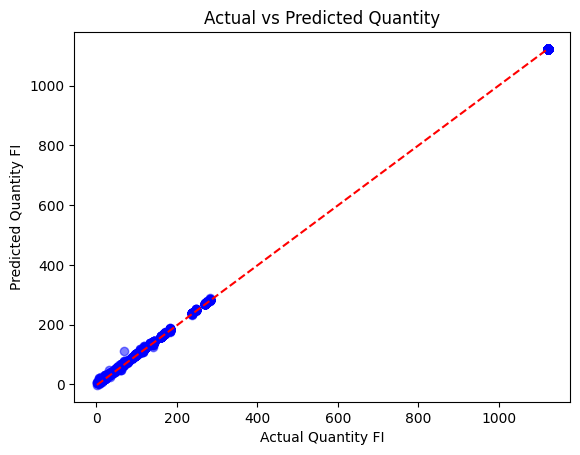

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')
plt.xlabel('Actual Quantity FI')
plt.ylabel('Predicted Quantity FI')
plt.title('Actual vs Predicted Quantity')
plt.show()

In [13]:
# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.743456000717059


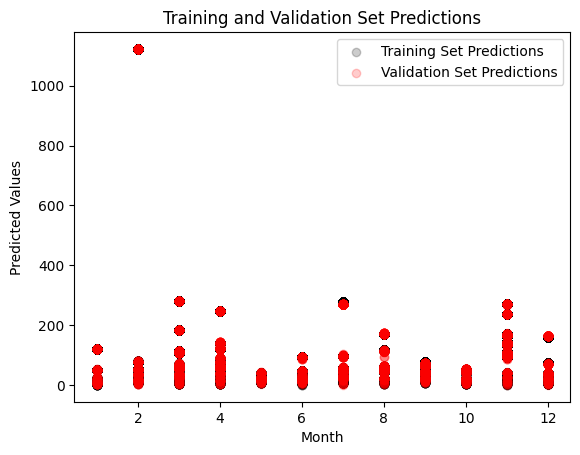

In [17]:
from numpy.ma.core import size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Initialize arrays to store predictions and corresponding months
predictions_train = []
predictions_val = []
months_train = []
months_val = []

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Creating the XGBoost regression model
    model = XGBRegressor()

    # Train your model on the training data
    model.fit(X_train, y_train)

    # Store the predictions and corresponding months for the training set
    predictions_train.append(model.predict(X_train))
    months_train.append(X_train['Month'])

    # Store the predictions and corresponding months for the validation set
    predictions_val.append(model.predict(X_val))
    months_val.append(X_val['Month'])

# Concatenate the predictions and months arrays
predictions_train = np.concatenate(predictions_train)
predictions_val = np.concatenate(predictions_val)
months_train = np.concatenate(months_train)
months_val = np.concatenate(months_val)

# Plot the training set predictions
plt.scatter(months_train, predictions_train, color='black', label='Training Set Predictions',alpha=0.2,)

# Plot the validation set predictions
plt.scatter(months_val, predictions_val, color='red', label='Validation Set Predictions',alpha=0.2)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Predicted Values')
plt.title('Training and Validation Set Predictions')

# Add legend
plt.legend()

# Show the plot
plt.show()
